In [ ]:
import pandas as pd

df=pd.read_csv("spam_ham_dataset.csv")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
df=df[['label','text']]
df

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [ ]:
df["label"].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

<BarContainer object of 2 artists>

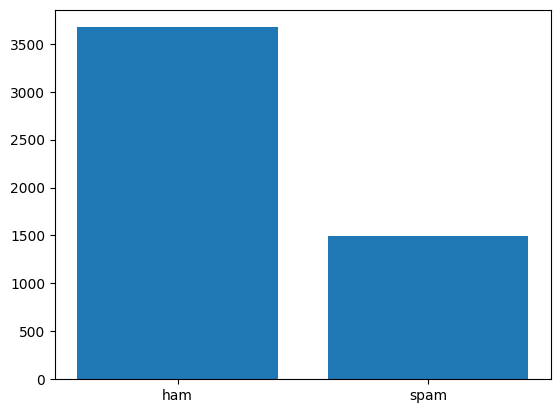

In [ ]:
import matplotlib.pyplot as plt
plt.bar(df["label"].value_counts().index,df["label"].value_counts())

In [ ]:
df["label"].unique()

array(['ham', 'spam'], dtype=object)

# **Supprission de la ponctuation**

In [ ]:
#1er methode replace (plus simple)
import string

def supprime_ponctuation(text):
  for i in text:
    if i in string.punctuation:
      text=text.replace(i,'')
  return text

text=supprime_ponctuation("->la ponctuation, est : enlevée_de cette ? phrase.!")
text

'la ponctuation est  enlevéede cette  phrase'

In [ ]:
#2eme methode translate (plus complexe et puissant)
import string

def supprime_ponctuation1(text):
  text=text.translate(str.maketrans('','',string.punctuation)) #3eme element a ssupprimer
  return text

text=supprime_ponctuation("->la ponctuation, est : enlevée_de cette ? phrase.!")
text

'la ponctuation est  enlevéede cette  phrase'

In [ ]:
#3eme methode expression regulière
import re

def supprime_ponctuation2(text):
  text=re.sub("[^\w\s]",'',text) #remplace les elements qui ne sont pas des lettres ou des espaces par une chaine vide
  return text

text=supprime_ponctuation("->la ponctuation, est : enlevée_de cette ? phrase.!")
text


'la ponctuation est  enlevéede cette  phrase'

In [ ]:
df["text"]=df["text"].astype(str)
df["text_p"]=df["text"].apply(supprime_ponctuation)
df

<ipython-input-16-b53d94f237d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"]=df["text"].astype(str)
<ipython-input-16-b53d94f237d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_p"]=df["text"].apply(supprime_ponctuation)


,label,text,text_p
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,Subject put the 10 on the ft\r\nthe transport ...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,Subject 3 4 2000 and following noms\r\nhpl c...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,Subject calpine daily gas nomination\r\n\r\n\r...
5169,ham,Subject: industrial worksheets for august 2000...,Subject industrial worksheets for august 2000 ...


# **Suppression de url**

In [ ]:
#1er methode urlparse
from urllib.parse import urlparse

def supprime_url(text):
  l=[i for i in text.split() if not urlparse(i).scheme] #si cette partie ne contient pas de url on l'ajoute a la liste
  text=' '.join(l)
  return text
text=supprime_url("premier url est de google https:\\exemple.com et puis pas de url")
text

'premier url est de google et puis pas de url'

In [ ]:
#2er methode expression regulière
import re

def supprime_url2(text):
  text=re.sub("http\S+|https\S+",'',text) #par tres precis, supprime que les http url
  return text

text=supprime_url("premier url est de google https:\\exemple.com et puis pas de url")
text

'premier url est de google et puis pas de url'

In [ ]:
df["text_u"]=df["text_p"].apply(supprime_url)
df

,label,text,text_p,text_u
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,Subject enron methanol meter 988291 this is a ...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,Subject hpl nom for january 9 2001 see attache...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,Subject neon retreat ho ho ho we re around to ...
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,Subject photoshop windows office cheap main tr...
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,Subject re indian springs this deal is to book...
...,...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,Subject put the 10 on the ft\r\nthe transport ...,Subject put the 10 on the ft the transport vol...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,Subject 3 4 2000 and following noms\r\nhpl c...,Subject 3 4 2000 and following noms hpl can t ...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,Subject calpine daily gas nomination\r\n\r\n\r...,Subject calpine daily gas nomination julie as ...
5169,ham,Subject: industrial worksheets for august 2000...,Subject industrial worksheets for august 2000 ...,Subject industrial worksheets for august 2000 ...


# **Correction des fautes d'orthographe**

In [ ]:
#1er methode TextBlob
from textblob import TextBlob

def corriger(text):
  text=TextBlob(text)
  return text.correct()

text=corriger("I m not in dangre,you aer")
str(text)


'I m not in danger,you her'

In [ ]:
#correction d'un seul mot
from textblob import Word

word=Word('wormd')
word.spellcheck()

[('world', 0.537890044576523),
 ('word', 0.4427934621099554),
 ('worm', 0.01337295690936107),
 ('worms', 0.005943536404160475)]

In [ ]:
#2eme methode Word
from textblob import Word

def corriger_w(text):
  l=[]
  for word in text.split():
    word=Word(word)
    l.append(word.spellcheck()[0][0])
  return ' '.join(l)

text=corriger_w(" i am in dangre ")
text

'i am in danger'

In [ ]:
df["text_lower"]=df["text_p"].str.lower()
df

,label,text,text_p,text_u,text_lower
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,Subject enron methanol meter 988291 this is a ...,subject enron methanol meter 988291\r\nthis...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,Subject hpl nom for january 9 2001 see attache...,subject hpl nom for january 9 2001\r\n see at...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,Subject neon retreat ho ho ho we re around to ...,subject neon retreat\r\nho ho ho we re aroun...
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,Subject photoshop windows office cheap main tr...,subject photoshop windows office cheap mai...
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,Subject re indian springs this deal is to book...,subject re indian springs\r\nthis deal is to ...
...,...,...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,Subject put the 10 on the ft\r\nthe transport ...,Subject put the 10 on the ft the transport vol...,subject put the 10 on the ft\r\nthe transport ...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,Subject 3 4 2000 and following noms\r\nhpl c...,Subject 3 4 2000 and following noms hpl can t ...,subject 3 4 2000 and following noms\r\nhpl c...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,Subject calpine daily gas nomination\r\n\r\n\r...,Subject calpine daily gas nomination julie as ...,subject calpine daily gas nomination\r\n\r\n\r...
5169,ham,Subject: industrial worksheets for august 2000...,Subject industrial worksheets for august 2000 ...,Subject industrial worksheets for august 2000 ...,subject industrial worksheets for august 2000 ...


# **Tokenisation**

In [ ]:
#1er methode split
def tokenise_text(text):
  import re
  return re.split('\W+',text)  #split en tout symbole non alphabetique

tokenise=tokenise_text('la ponctuation est  enlevéede cette  phrase')
tokenise

['la', 'ponctuation', 'est', 'enlevéede', 'cette', 'phrase']

In [ ]:
#2eme methode findall
import re

def tokenise_text(text):
  return re.findall('\w+',text) #return tout les mot des lettres alphabetique

tokenise_text('la ponctuation est enlevéede cette phrase')


['la', 'ponctuation', 'est', 'enlevéede', 'cette', 'phrase']

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#3eme methode Word_tokenize
from nltk.tokenize import word_tokenize

def tokenise_text(text):
  return word_tokenize(text)  #wordpunct_tokenize(text)

tokenise_text('la ponctuation est enlevéede cette phrase. donc on la tokanize')

['la',
 'ponctuation',
 'est',
 'enlevéede',
 'cette',
 'phrase',
 '.',
 'donc',
 'on',
 'la',
 'tokanize']

In [ ]:
#3eme methode wordpunct_tokenize
from nltk.tokenize import wordpunct_tokenize #la punctuation est un separateur

def tokenise_text(text):
  return wordpunct_tokenize(text)

tokenise_text('la ponctuation est enlevéede cette phrase. donc on la tokanize')

['la',
 'ponctuation',
 'est',
 'enlevéede',
 'cette',
 'phrase',
 '.',
 'donc',
 'on',
 'la',
 'tokanize']

In [ ]:
#4eme methode sent_tokenize
#si c'est tout une paragraphe
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenise_text(text):
  phrase=sent_tokenize(text)
  print(phrase)
  return [word_tokenize(i) for i in phrase]

tokenise_text('la ponctuation est enlevéede cette phrase')

['la ponctuation est enlevéede cette phrase']


[['la', 'ponctuation', 'est', 'enlevéede', 'cette', 'phrase']]

In [ ]:
#5eme methode keras test_to_word_sequence
#adapter plus au deeplearning
from keras.preprocessing.text import text_to_word_sequence

def tokenise_text(text):
  return text_to_word_sequence(text)

#convertir la phrase en miniscule
#supprimer la ponctuation
#tokanization par espace
tokenise_text('la ponctuation est enlevéede cette phrase. donc on la tokanize')

['la',
 'ponctuation',
 'est',
 'enlevéede',
 'cette',
 'phrase',
 'donc',
 'on',
 'la',
 'tokanize']

In [ ]:
df["text_tockenise"]=df["text_lower"].apply(tokenise_text)
df

,label,text,text_p,text_u,text_lower,text_tockenise
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,Subject enron methanol meter 988291 this is a ...,subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291\r, th..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,Subject hpl nom for january 9 2001 see attache...,subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001\r, s..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,Subject neon retreat ho ho ho we re around to ...,subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat\r, ho, ho, ho, we, re,..."
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,Subject photoshop windows office cheap main tr...,subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,Subject re indian springs this deal is to book...,subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs\r, this, deal, i..."
...,...,...,...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,Subject put the 10 on the ft\r\nthe transport ...,Subject put the 10 on the ft the transport vol...,subject put the 10 on the ft\r\nthe transport ...,"[subject, put, the, 10, on, the, ft\r, the, tr..."
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,Subject 3 4 2000 and following noms\r\nhpl c...,Subject 3 4 2000 and following noms hpl can t ...,subject 3 4 2000 and following noms\r\nhpl c...,"[subject, 3, 4, 2000, and, following, noms\r, ..."
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,Subject calpine daily gas nomination\r\n\r\n\r...,Subject calpine daily gas nomination julie as ...,subject calpine daily gas nomination\r\n\r\n\r...,"[subject, calpine, daily, gas, nomination\r, \..."
5169,ham,Subject: industrial worksheets for august 2000...,Subject industrial worksheets for august 2000 ...,Subject industrial worksheets for august 2000 ...,subject industrial worksheets for august 2000 ...,"[subject, industrial, worksheets, for, august,..."


In [ ]:
#6eme methode spacy

import spacy
nlp=spacy.load("en_core_web_sm")

doc=nlp("la ponctuation est enlevéede cette phrase. donc on la tokanize")
for sens in doc.sents:
  for word in sens:
    print(word)

la
ponctuation
est
enlevéede
cette
phrase
.
donc
on
la
tokanize


# **Suppression de stopwords**

In [ ]:

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
#1er methode stopwords
def supprime_mots_vides(text):
  mots_non_vides =[]
  for i in text:
    if i not in stopwords.words('english'):
            mots_non_vides.append(i)
  return mots_non_vides
tockenise=['my','name','is','ours','it','is','maleke']
supprime_mots_vides(tockenise)

['name', 'maleke']

In [ ]:
df["no_stopwords"]=df["text_tockenise"].apply(supprime_mots_vides)
df

,label,text,text_p,text_u,text_lower,text_tockenise,no_stopwords
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,Subject enron methanol meter 988291 this is a ...,subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291\r, th...","[subject, enron, methanol, meter, 988291\r, fo..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,Subject hpl nom for january 9 2001 see attache...,subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001\r, s...","[subject, hpl, nom, january, 9, 2001\r, see, a..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,Subject neon retreat ho ho ho we re around to ...,subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat\r, ho, ho, ho, we, re,...","[subject, neon, retreat\r, ho, ho, ho, around,..."
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,Subject photoshop windows office cheap main tr...,subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, windows, office, cheap, m..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,Subject re indian springs this deal is to book...,subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs\r, this, deal, i...","[subject, indian, springs\r, deal, book, teco,..."
...,...,...,...,...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,Subject put the 10 on the ft\r\nthe transport ...,Subject put the 10 on the ft the transport vol...,subject put the 10 on the ft\r\nthe transport ...,"[subject, put, the, 10, on, the, ft\r, the, tr...","[subject, put, 10, ft\r, transport, volumes, d..."
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,Subject 3 4 2000 and following noms\r\nhpl c...,Subject 3 4 2000 and following noms hpl can t ...,subject 3 4 2000 and following noms\r\nhpl c...,"[subject, 3, 4, 2000, and, following, noms\r, ...","[subject, 3, 4, 2000, following, noms\r, hpl, ..."
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,Subject calpine daily gas nomination\r\n\r\n\r...,Subject calpine daily gas nomination julie as ...,subject calpine daily gas nomination\r\n\r\n\r...,"[subject, calpine, daily, gas, nomination\r, \...","[subject, calpine, daily, gas, nomination\r, \..."
5169,ham,Subject: industrial worksheets for august 2000...,Subject industrial worksheets for august 2000 ...,Subject industrial worksheets for august 2000 ...,subject industrial worksheets for august 2000 ...,"[subject, industrial, worksheets, for, august,...","[subject, industrial, worksheets, august, 2000..."


# **Stemming**


In [ ]:
#1er methode PorterStemmer
#seulement l'anglais
#plus rapide
from nltk.stem import PorterStemmer
P_stemmer = PorterStemmer()

df['text_Pstem'] = df['no_stopwords'].apply(lambda liste: [P_stemmer.stem(mot) for mot in liste])
df

,label,text,text_p,text_u,text_lower,text_tockenise,no_stopwords,text_Pstem
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,Subject enron methanol meter 988291 this is a ...,subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291\r, th...","[subject, enron, methanol, meter, 988291\r, fo...","[subject, enron, methanol, meter, 988291\r, fo..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,Subject hpl nom for january 9 2001 see attache...,subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001\r, s...","[subject, hpl, nom, january, 9, 2001\r, see, a...","[subject, hpl, nom, januari, 9, 2001\r, see, a..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,Subject neon retreat ho ho ho we re around to ...,subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat\r, ho, ho, ho, we, re,...","[subject, neon, retreat\r, ho, ho, ho, around,...","[subject, neon, retreat\r, ho, ho, ho, around,..."
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,Subject photoshop windows office cheap main tr...,subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, window, offic, cheap, mai..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,Subject re indian springs this deal is to book...,subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs\r, this, deal, i...","[subject, indian, springs\r, deal, book, teco,...","[subject, indian, springs\r, deal, book, teco,..."
...,...,...,...,...,...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,Subject put the 10 on the ft\r\nthe transport ...,Subject put the 10 on the ft the transport vol...,subject put the 10 on the ft\r\nthe transport ...,"[subject, put, the, 10, on, the, ft\r, the, tr...","[subject, put, 10, ft\r, transport, volumes, d...","[subject, put, 10, ft\r, transport, volum, dec..."
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,Subject 3 4 2000 and following noms\r\nhpl c...,Subject 3 4 2000 and following noms hpl can t ...,subject 3 4 2000 and following noms\r\nhpl c...,"[subject, 3, 4, 2000, and, following, noms\r, ...","[subject, 3, 4, 2000, following, noms\r, hpl, ...","[subject, 3, 4, 2000, follow, noms\r, hpl, tak..."
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,Subject calpine daily gas nomination\r\n\r\n\r...,Subject calpine daily gas nomination julie as ...,subject calpine daily gas nomination\r\n\r\n\r...,"[subject, calpine, daily, gas, nomination\r, \...","[subject, calpine, daily, gas, nomination\r, \...","[subject, calpin, daili, ga, nomination\r, \r,..."
5169,ham,Subject: industrial worksheets for august 2000...,Subject industrial worksheets for august 2000 ...,Subject industrial worksheets for august 2000 ...,subject industrial worksheets for august 2000 ...,"[subject, industrial, worksheets, for, august,...","[subject, industrial, worksheets, august, 2000...","[subject, industri, worksheet, august, 2000, a..."


In [ ]:
#2eme methode LancasterStemmer
#seulement l'anglais
#iterative donc supprime plus de lettres des mots
from nltk.stem import LancasterStemmer
L_stemmer = LancasterStemmer()

df['text_Lstem'] = df['no_stopwords'].apply(lambda liste: [L_stemmer.stem(mot) for mot in liste])
df

,label,text,text_p,text_u,text_lower,text_tockenise,no_stopwords,text_Pstem,text_Lstem
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,Subject enron methanol meter 988291 this is a ...,subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291\r, th...","[subject, enron, methanol, meter, 988291\r, fo...","[subject, enron, methanol, meter, 988291\r, fo...","[subject, enron, methanol, met, 988291\r, foll..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,Subject hpl nom for january 9 2001 see attache...,subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001\r, s...","[subject, hpl, nom, january, 9, 2001\r, see, a...","[subject, hpl, nom, januari, 9, 2001\r, see, a...","[subject, hpl, nom, janu, 9, 2001\r, see, atta..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,Subject neon retreat ho ho ho we re around to ...,subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat\r, ho, ho, ho, we, re,...","[subject, neon, retreat\r, ho, ho, ho, around,...","[subject, neon, retreat\r, ho, ho, ho, around,...","[subject, neon, retreat\r, ho, ho, ho, around,..."
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,Subject photoshop windows office cheap main tr...,subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, window, offic, cheap, mai...","[subject, photoshop, window, off, cheap, main,..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,Subject re indian springs this deal is to book...,subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs\r, this, deal, i...","[subject, indian, springs\r, deal, book, teco,...","[subject, indian, springs\r, deal, book, teco,...","[subject, ind, springs\r, deal, book, teco, pv..."
...,...,...,...,...,...,...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,Subject put the 10 on the ft\r\nthe transport ...,Subject put the 10 on the ft the transport vol...,subject put the 10 on the ft\r\nthe transport ...,"[subject, put, the, 10, on, the, ft\r, the, tr...","[subject, put, 10, ft\r, transport, volumes, d...","[subject, put, 10, ft\r, transport, volum, dec...","[subject, put, 10, ft\r, transport, volum, dec..."
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,Subject 3 4 2000 and following noms\r\nhpl c...,Subject 3 4 2000 and following noms hpl can t ...,subject 3 4 2000 and following noms\r\nhpl c...,"[subject, 3, 4, 2000, and, following, noms\r, ...","[subject, 3, 4, 2000, following, noms\r, hpl, ...","[subject, 3, 4, 2000, follow, noms\r, hpl, tak...","[subject, 3, 4, 2000, follow, noms\r, hpl, tak..."
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,Subject calpine daily gas nomination\r\n\r\n\r...,Subject calpine daily gas nomination julie as ...,subject calpine daily gas nomination\r\n\r\n\r...,"[subject, calpine, daily, gas, nomination\r, \...","[subject, calpine, daily, gas, nomination\r, \...","[subject, calpin, daili, ga, nomination\r, \r,...","[subject, calpin, dai, gas, nomination\r, \r, ..."
5169,ham,Subject: industrial worksheets for august 2000...,Subject industrial worksheets for august 2000 ...,Subject industrial worksheets for august 2000 ...,subject industrial worksheets for august 2000 ...,"[subject, industrial, worksheets, for, august,...","[subject, industrial, worksheets, august, 2000...","[subject, industri, worksheet, august, 2000, a...","[subject, indust, worksheet, august, 2000, act..."


In [ ]:
#3eme methode SnowballStemmer
#plusieurs langue
from nltk.stem import SnowballStemmer
S_stemmer = SnowballStemmer(language='english')

df['text_Sstem'] = df['no_stopwords'].apply(lambda liste: [S_stemmer.stem(mot) for mot in liste])
df

,label,text,text_p,text_u,text_lower,text_tockenise,no_stopwords,text_Pstem,text_Lstem,text_Sstem
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,Subject enron methanol meter 988291 this is a ...,subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291\r, th...","[subject, enron, methanol, meter, 988291\r, fo...","[subject, enron, methanol, meter, 988291\r, fo...","[subject, enron, methanol, met, 988291\r, foll...","[subject, enron, methanol, meter, 988291\r, fo..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,Subject hpl nom for january 9 2001 see attache...,subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001\r, s...","[subject, hpl, nom, january, 9, 2001\r, see, a...","[subject, hpl, nom, januari, 9, 2001\r, see, a...","[subject, hpl, nom, janu, 9, 2001\r, see, atta...","[subject, hpl, nom, januari, 9, 2001\r, see, a..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,Subject neon retreat ho ho ho we re around to ...,subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat\r, ho, ho, ho, we, re,...","[subject, neon, retreat\r, ho, ho, ho, around,...","[subject, neon, retreat\r, ho, ho, ho, around,...","[subject, neon, retreat\r, ho, ho, ho, around,...","[subject, neon, retreat\r, ho, ho, ho, around,..."
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,Subject photoshop windows office cheap main tr...,subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, window, offic, cheap, mai...","[subject, photoshop, window, off, cheap, main,...","[subject, photoshop, window, offic, cheap, mai..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,Subject re indian springs this deal is to book...,subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs\r, this, deal, i...","[subject, indian, springs\r, deal, book, teco,...","[subject, indian, springs\r, deal, book, teco,...","[subject, ind, springs\r, deal, book, teco, pv...","[subject, indian, springs\r, deal, book, teco,..."
...,...,...,...,...,...,...,...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,Subject put the 10 on the ft\r\nthe transport ...,Subject put the 10 on the ft the transport vol...,subject put the 10 on the ft\r\nthe transport ...,"[subject, put, the, 10, on, the, ft\r, the, tr...","[subject, put, 10, ft\r, transport, volumes, d...","[subject, put, 10, ft\r, transport, volum, dec...","[subject, put, 10, ft\r, transport, volum, dec...","[subject, put, 10, ft\r, transport, volum, dec..."
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,Subject 3 4 2000 and following noms\r\nhpl c...,Subject 3 4 2000 and following noms hpl can t ...,subject 3 4 2000 and following noms\r\nhpl c...,"[subject, 3, 4, 2000, and, following, noms\r, ...","[subject, 3, 4, 2000, following, noms\r, hpl, ...","[subject, 3, 4, 2000, follow, noms\r, hpl, tak...","[subject, 3, 4, 2000, follow, noms\r, hpl, tak...","[subject, 3, 4, 2000, follow, noms\r, hpl, tak..."
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,Subject calpine daily gas nomination\r\n\r\n\r...,Subject calpine daily gas nomination julie as ...,subject calpine daily gas nomination\r\n\r\n\r...,"[subject, calpine, daily, gas, nomination\r, \...","[subject, calpine, daily, gas, nomination\r, \...","[subject, calpin, daili, ga, nomination\r, \r,...","[subject, calpin, dai, gas, nomination\r, \r, ...","[subject, calpin, daili, gas, nomination\r, \r..."
5169,ham,Subject: industrial worksheets for august 2000...,Subject industrial worksheets for august 2000 ...,Subject industrial worksheets f

# **Lemmatisation**

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#1er methode WordNetLemmatizer
#utilise le dict wordnet
def lemmatizer_text(list):
  from nltk.stem import WordNetLemmatizer
  lemmatizer = WordNetLemmatizer()
  j=[]
  for i in list:
    j.append(lemmatizer.lemmatize(i))
  return j


In [ ]:
df["text_lem"]=df["no_stopwords"].apply(lemmatizer_text)
df

,label,text,text_p,text_u,text_lower,text_tockenise,no_stopwords,text_Pstem,text_Lstem,text_Sstem,text_lem
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,Subject enron methanol meter 988291 this is a ...,subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291\r, th...","[subject, enron, methanol, meter, 988291\r, fo...","[subject, enron, methanol, meter, 988291\r, fo...","[subject, enron, methanol, met, 988291\r, foll...","[subject, enron, methanol, meter, 988291\r, fo...","[subject, enron, methanol, meter, 988291\r, fo..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,Subject hpl nom for january 9 2001 see attache...,subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001\r, s...","[subject, hpl, nom, january, 9, 2001\r, see, a...","[subject, hpl, nom, januari, 9, 2001\r, see, a...","[subject, hpl, nom, janu, 9, 2001\r, see, atta...","[subject, hpl, nom, januari, 9, 2001\r, see, a...","[subject, hpl, nom, january, 9, 2001\r, see, a..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,Subject neon retreat ho ho ho we re around to ...,subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat\r, ho, ho, ho, we, re,...","[subject, neon, retreat\r, ho, ho, ho, around,...","[subject, neon, retreat\r, ho, ho, ho, around,...","[subject, neon, retreat\r, ho, ho, ho, around,...","[subject, neon, retreat\r, ho, ho, ho, around,...","[subject, neon, retreat\r, ho, ho, ho, around,..."
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,Subject photoshop windows office cheap main tr...,subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, window, offic, cheap, mai...","[subject, photoshop, window, off, cheap, main,...","[subject, photoshop, window, offic, cheap, mai...","[subject, photoshop, window, office, cheap, ma..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,Subject re indian springs this deal is to book...,subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs\r, this, deal, i...","[subject, indian, springs\r, deal, book, teco,...","[subject, indian, springs\r, deal, book, teco,...","[subject, ind, springs\r, deal, book, teco, pv...","[subject, indian, springs\r, deal, book, teco,...","[subject, indian, springs\r, deal, book, teco,..."
...,...,...,...,...,...,...,...,...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,Subject put the 10 on the ft\r\nthe transport ...,Subject put the 10 on the ft the transport vol...,subject put the 10 on the ft\r\nthe transport ...,"[subject, put, the, 10, on, the, ft\r, the, tr...","[subject, put, 10, ft\r, transport, volumes, d...","[subject, put, 10, ft\r, transport, volum, dec...","[subject, put, 10, ft\r, transport, volum, dec...","[subject, put, 10, ft\r, transport, volum, dec...","[subject, put, 10, ft\r, transport, volume, de..."
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,Subject 3 4 2000 and following noms\r\nhpl c...,Subject 3 4 2000 and following noms hpl can t ...,subject 3 4 2000 and following noms\r\nhpl c...,"[subject, 3, 4, 2000, and, following, noms\r, ...","[subject, 3, 4, 2000, following, noms\r, hpl, ...","[subject, 3, 4, 2000, follow, noms\r, hpl, tak...","[subject, 3, 4, 2000, follow, noms\r, hpl, tak...","[subject, 3, 4, 2000, follow, noms\r, hpl, tak...","[subject, 3, 4, 2000, following, noms\r, hpl, ..."
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,Subject calpine daily gas nomination\r\n\r\n\r...,Subject calpine daily gas nomination julie as ...,subject calpine daily gas nomination\r\n\r\n\r...,"[subject, calpine, dai

In [ ]:
df["text_lem"]=df["no_stopwords"].apply(lambda liste: [lemmatizer_text(mot) for mot in liste])


In [ ]:
#2eme methode TextBlob .lemmatize
from textblob import TextBlob

blob = TextBlob("The striped bats are hanging on their feet for best")
lemmatized_sentence = " ".join([word.lemmatize() for word in blob.words])
print(lemmatized_sentence)

The striped bat are hanging on their foot for best


In [ ]:
#3eme methode spacy token.lemm_
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp("The striped bats are hanging on their feet for best")

lemmatized_sentence = " ".join([token.lemma_ for token in doc])
print(lemmatized_sentence)

the stripe bat be hang on their foot for good
